In [2]:
import pygame
def play_music(name):
    pygame.mixer.init()
    pygame.mixer.music.load(name)
    pygame.mixer.music.play()


In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df=pd.read_json('53e9aa95b7602d970340bc5c_venue.json',lines=True ,orient='records')
G=nx.Graph()
edgelist=[]
for i in df.iterrows():
    if i[1]['references']!=None:
        for j in i[1]['references']:
                edgelist.append((i[1]['id'],j))
                # G.add_edge(i[1]['id'],j)
edgelist=pd.DataFrame(edgelist,columns=['source','target'])
edgelist = edgelist[edgelist['target'].isin(df['id'])]
# G = nx.from_pandas_edgelist(edgelist, 'source', 'target')
G = nx.from_pandas_edgelist(edgelist, 'source', 'target',create_using=nx.DiGraph())


In [3]:
df

,id,title,year,n_citation,abstract,authors,references,venue,raw_venue
0,53e999f5b7602d970223c6e5,Chromatic partitions of graph,1989,2,Let χ ( G ) be the chromatic number of a graph...,"[{'id': '5405947adabfae8faa5e4af7', 'name': 'E...",[53e99b26b7602d97023bc44d],{'raw': 'Discrete Mathematics - Graph colourin...,Discrete Mathematics - Graph colouring and var...
1,53e99f2db7602d97027f8406,CHARACTERIZING TRAFFIC-AWARE OVERLAY TOPOLOGIE...,2008,1,Abstract Overlay networks are application-laye...,"[{'id': '53f42663dabfaeb2acfa7f07', 'name': 'B...","[557e40ccd19faf961d16847b, 53e997b2b7602d9701f...",{'raw': ''},
2,56d8ce57dabfae2eee8f4611,Harmonic index of dense graphs,2015,1,The harmonic weight of an edge is defined as r...,"[{'id': '', 'name': 'jianxi liu', 'org': ''}]","[53e9b5c8b7602d970410ff96, 53e9be80b7602d9704b...",{'raw': 'ARS COMBINATORIA'},ARS COMBINATORIA
3,56d92b5adabfae2eeeda5f40,Traffic Routing Oligopoly,2015,5,The purpose of this paper is to introduce a no...,"[{'id': '53f4360edabfaee43ec2d340', 'name': 'D...","[558aebbce4b031bae1fa78ea, 53e9984bb7602d97020...",{'raw': 'Central European Journal of Operation...,Central European Journal of Operations Research
4,5ce2cf54ced107d4c63134ad,On the randic index of graphs,2019,0,"For a given graph G=(V,E), the degree mean rat...","[{'id': '53f431bfdabfaee2a1cb4428', 'name': 'C...","[53e99aa6b7602d9702321590, 53e9aa2bb7602d97033...",{'raw': 'Discrete Mathematics'},Discrete Mathematics
...,...,...,...,...,...,...,...,...,...
2441,5ff8834c91e011c832672655,Evolution of Deterministic Hill-climbers,2020,3,Local search algorithms consist in evolving a ...,"[{'id': '', 'name': 'Vincent Hénaux', 'org': '...","[53e9997eb7602d97021c1ab2, 56d8279fdabfae2eeee...",{'raw': '2020 IEEE 32nd International Conferen...,2020 IEEE 32nd International Conference on Too...
2442,60152f95ca531faf3e43a01e,Ramanujan graphs and the spectral gap of super...,2021,1,Graph eigenvalues play a fundamental role in c...,"[{'id': '53f439e6dabfaee2a1d06b69', 'name': 'S...","[53e9ad63b7602d970374a195, 53e99bdcb7602d97024...",{'raw': 'The Journal of Supercomputing'},The Journal of Supercomputing
2443,601bc6d491e0114b62e77fcb,Onsite medical waste multi-objective vehicle r...,2018,0,Healthcare services provided by hospitals gene...,"[{'id': '', 'name': 'Hajar Zkeik', 'org': 'Dep...","[53e99a0eb7602d9702261589, 56d8279fdabfae2eeee...",{'raw': '2018 4th International Conference on ...,2018 4th International Conference on Logistics...
2444,60376a31d3485cfff1dfa91d,SAFE: Scale-Adaptive Fitness Evaluation Method...,2021,41,The key challenge of expensive optimization pr...,"[{'id': '', 'name': 'Sheng-Hao Wu', 'org': 'Sc...","[5f75b3719fced0a24b66f0bc, 53e99d36b7602d97025...",{'raw': 'IEEE Transactions on Evolutionary Com...,IEEE Transactions on Evolutionary Computation


In [53]:
df.shape

(2446, 9)

In [5]:
authorlist=[]
authorss=[]
author_edge_list=[]
for i in df.iterrows():
    if i[1]['authors']!=None:
        for j in i[1]['authors']:
                authorlist.append(j)
                authorss.append(j['id'])
                author_edge_list.append((i[1]['id'],j['name']))
                author_edge_list.append((j['name'],i[1]['id']))
                G.add_edge(i[1]['id'],j['name'])
                G.add_edge(j['name'],i[1]['id'])

author_edge_list=pd.DataFrame(author_edge_list,columns=['source','target'])
authorlist=pd.DataFrame(authorlist,columns=['id',"name",'org'])


In [6]:
A = nx.adjacency_matrix(G)  
A_square=A.dot(A)
A_cube=A_square.dot(A)

C:\Users\Gaurav B V\AppData\Local\Temp\ipykernel_14208\976697560.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [7]:
# Assuming 'g' is your NetworkX graph
is_directed = G.is_directed()

if is_directed:
    print("The graph is directed.")
else:
    print("The graph is undirected.")

The graph is directed.


In [8]:
A = nx.adjacency_matrix(G)  
A_square=A.dot(A)
A_cube=A_square.dot(A)

nodes = list(G.nodes())

row_to_node = {node: index for index, node in enumerate(nodes)}

C:\Users\Gaurav B V\AppData\Local\Temp\ipykernel_14208\1062570646.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [9]:
A_dense = A_cube.todense()

row_index = 3
row_elements = A_dense.tolist()  

print(f"Elements of row {row_index}: {row_elements[row_index]}")

Elements of row 3: [0, 1, 0, 7, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
row_elements = A_cube.getrow(row_index).toarray().flatten().tolist()


In [11]:
len(row_elements)

6729

In [12]:
def checking(node):
    try:
        row_elements = A_cube[[row_to_node[node]]].toarray().flatten().tolist()
        return row_elements[row_to_node[node]] !=0
    except:
        print(node)

In [13]:
self_citing=[]
for i in authorlist['name']:
    if checking(i):
        self_citing.append(i)

In [14]:
condition1=authorlist['name'].apply(checking)
self_citing_authors=authorlist[condition1]

In [15]:
self_citing_authors.shape

(2331, 3)

In [16]:
import networkx as nx
def hop_neighbour(G,node,k):
    k_hop_neighborhood = nx.single_source_shortest_path_length(G, node, cutoff=k)

    k_hop_nodes = list(k_hop_neighborhood.keys())
    return k_hop_nodes

def k_hop_subgraph(G, node, k):
    k_hop_neighborhood = nx.single_source_shortest_path_length(G, node, cutoff=k)
    k_hop_nodes = list(k_hop_neighborhood.keys())
    
    subgraph = G.subgraph(k_hop_nodes)
    
    return subgraph

In [17]:
test=dict()
import matplotlib
for i in self_citing:
    test[i]=k_hop_subgraph(G,i,1)
    # nx.draw(test,with_labels=True)


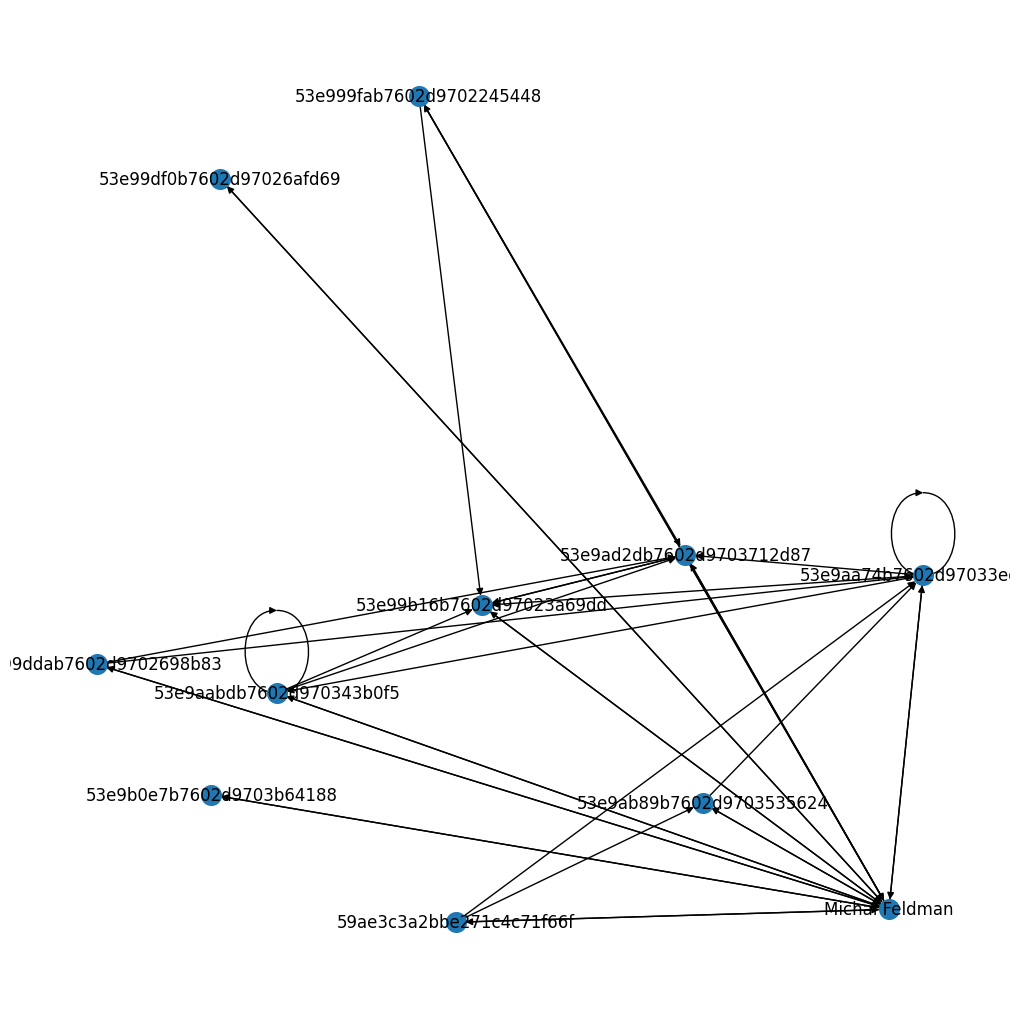

In [18]:
plt.figure(figsize=(10, 10))  
nx.draw(test['Michal Feldman'], pos=nx.random_layout(G), node_size=200, edge_color='k',with_labels=True)
plt.show()

In [11]:
import networkx as nx
def rotate_list(lst, positions):
    positions = positions % len(lst)
    return lst[positions:] + lst[:positions]
def find_cycles_for_node(graph, node):
    all_cycles = nx.simple_cycles(graph)
    node_cycles = [cycle for cycle in all_cycles if node in cycle and len(cycle)==3]
    return node_cycles


In [20]:
self_citing_datas=[]
for i in test.keys():
    cycles = find_cycles_for_node(test[i], i)
    flag=[]
    for j in cycles:
        j.index(i)
        rr=rotate_list(j,j.index(i))
        flag.append(rr)
    fvvadfv=pd.DataFrame(flag,columns=['author','paper1','paper2'])
    filtered_abstracts = df[df['id'].isin(fvvadfv['paper1'])][['id', 'abstract']]
    fvvadfv = fvvadfv.merge(filtered_abstracts, left_on='paper1', right_on='id', how='left')
    fvvadfv['abstract_p1'] = fvvadfv['abstract']
    fvvadfv.drop(columns=['id', 'abstract'], inplace=True)
    filtered_abstracts = df[df['id'].isin(fvvadfv['paper2'])][['id', 'abstract']]
    fvvadfv = fvvadfv.merge(filtered_abstracts, left_on='paper2', right_on='id', how='left')
    fvvadfv['abstract_p2'] = fvvadfv['abstract']
    fvvadfv.drop(columns=['id', 'abstract'], inplace=True)
    self_citing_datas.append(fvvadfv)
play_music('Popular .mp3')

In [21]:
len(self_citing_datas)

638

In [22]:
self_citing_datas=pd.concat(self_citing_datas).reset_index(drop=True)
play_music('Popular .mp3')

In [23]:
self_citing_datas.to_csv("self_citation.csv")

In [24]:
self_citing_datas

,author,paper1,paper2,abstract_p1,abstract_p2
0,Éva Tardos,55503eb145ce0a409eb2a50b,53e9a7ebb7602d970312c1e0,This essay introduces the symposium on compute...,We introduce a simple network design game that...
1,Éva Tardos,55503eb145ce0a409eb2a50b,53e9a9a2b7602d97033003e7,This essay introduces the symposium on compute...,We consider the problem of routing traffic to ...
2,Éva Tardos,53e9bb79b7602d97047ba5d5,53e9a7ebb7602d970312c1e0,There are a number of domains where agents mus...,We introduce a simple network design game that...
3,Éva Tardos,53e9b5c8b7602d970410fc89,53e9a9a2b7602d97033003e7,Network design is a fundamental problem for wh...,We consider the problem of routing traffic to ...
4,Éva Tardos,53e9b5c8b7602d970410fc89,53e9a7ebb7602d970312c1e0,Network design is a fundamental problem for wh...,We introduce a simple network design game that...
...,...,...,...,...,...
1798,Muhammad Kamran Siddiqui,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf3ad,Chemical graph theory plays an important role ...,The utilizations of graph theory in chemistry ...
1799,Abdul Qudair Baig,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf383,Chemical graph theory plays an important role ...,The bismuth tri-iodide (BiI3) is an inorganic ...
1800,Muhammad Naeem,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf3ad,Chemical graph theory plays an important role ...,The utilizations of graph theory in chemistry ...
1801,Zhao Wang,5c4707d97301396d1ffab421,5c8cf7b24895d9cbc62ef33a,"The matching preclusion number of a graph G, d...",The matching preclusion number of a graph is t...


In [25]:
self_citing_datas.columns

Index(['author', 'paper1', 'paper2', 'abstract_p1', 'abstract_p2'], dtype='object')

In [26]:
self_citing_datas['abstract_p2'][81]

'ontents'

In [27]:
self_citing_datas['author'][81]

'Zsolt Tuza'

In [28]:
condition1=self_citing_datas['abstract_p1']==''
word_count = self_citing_datas['abstract_p1'].str.split().apply(len)


flag=self_citing_datas[~condition1]

In [29]:
flag

,author,paper1,paper2,abstract_p1,abstract_p2
0,Éva Tardos,55503eb145ce0a409eb2a50b,53e9a7ebb7602d970312c1e0,This essay introduces the symposium on compute...,We introduce a simple network design game that...
1,Éva Tardos,55503eb145ce0a409eb2a50b,53e9a9a2b7602d97033003e7,This essay introduces the symposium on compute...,We consider the problem of routing traffic to ...
2,Éva Tardos,53e9bb79b7602d97047ba5d5,53e9a7ebb7602d970312c1e0,There are a number of domains where agents mus...,We introduce a simple network design game that...
3,Éva Tardos,53e9b5c8b7602d970410fc89,53e9a9a2b7602d97033003e7,Network design is a fundamental problem for wh...,We consider the problem of routing traffic to ...
4,Éva Tardos,53e9b5c8b7602d970410fc89,53e9a7ebb7602d970312c1e0,Network design is a fundamental problem for wh...,We introduce a simple network design game that...
...,...,...,...,...,...
1798,Muhammad Kamran Siddiqui,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf3ad,Chemical graph theory plays an important role ...,The utilizations of graph theory in chemistry ...
1799,Abdul Qudair Baig,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf383,Chemical graph theory plays an important role ...,The bismuth tri-iodide (BiI3) is an inorganic ...
1800,Muhammad Naeem,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf3ad,Chemical graph theory plays an important role ...,The utilizations of graph theory in chemistry ...
1801,Zhao Wang,5c4707d97301396d1ffab421,5c8cf7b24895d9cbc62ef33a,"The matching preclusion number of a graph G, d...",The matching preclusion number of a graph is t...


In [30]:
self_citing_datas['abstract_p1']

0       This essay introduces the symposium on compute...
1       This essay introduces the symposium on compute...
2       There are a number of domains where agents mus...
3       Network design is a fundamental problem for wh...
4       Network design is a fundamental problem for wh...
                              ...                        
1798    Chemical graph theory plays an important role ...
1799    Chemical graph theory plays an important role ...
1800    Chemical graph theory plays an important role ...
1801    The matching preclusion number of a graph G, d...
1802    The matching preclusion number of a graph G, d...
Name: abstract_p1, Length: 1803, dtype: object

In [31]:
word_count = self_citing_datas['abstract_p1'].str.split().apply(len)

filtered_df = self_citing_datas[~ (word_count <= 10) ]
word_count2 = filtered_df['abstract_p2'].str.split().apply(len)
filtered_df=filtered_df[~ (word_count2 <= 10) ]

filtered_df

,author,paper1,paper2,abstract_p1,abstract_p2
0,Éva Tardos,55503eb145ce0a409eb2a50b,53e9a7ebb7602d970312c1e0,This essay introduces the symposium on compute...,We introduce a simple network design game that...
1,Éva Tardos,55503eb145ce0a409eb2a50b,53e9a9a2b7602d97033003e7,This essay introduces the symposium on compute...,We consider the problem of routing traffic to ...
2,Éva Tardos,53e9bb79b7602d97047ba5d5,53e9a7ebb7602d970312c1e0,There are a number of domains where agents mus...,We introduce a simple network design game that...
3,Éva Tardos,53e9b5c8b7602d970410fc89,53e9a9a2b7602d97033003e7,Network design is a fundamental problem for wh...,We consider the problem of routing traffic to ...
4,Éva Tardos,53e9b5c8b7602d970410fc89,53e9a7ebb7602d970312c1e0,Network design is a fundamental problem for wh...,We introduce a simple network design game that...
...,...,...,...,...,...
1798,Muhammad Kamran Siddiqui,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf3ad,Chemical graph theory plays an important role ...,The utilizations of graph theory in chemistry ...
1799,Abdul Qudair Baig,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf383,Chemical graph theory plays an important role ...,The bismuth tri-iodide (BiI3) is an inorganic ...
1800,Muhammad Naeem,5bbacb8817c44aecc4eaf3ec,5bbacb8817c44aecc4eaf3ad,Chemical graph theory plays an important role ...,The utilizations of graph theory in chemistry ...
1801,Zhao Wang,5c4707d97301396d1ffab421,5c8cf7b24895d9cbc62ef33a,"The matching preclusion number of a graph G, d...",The matching preclusion number of a graph is t...


In [32]:
filtered_df.to_csv('cleaned_sel_citation.csv')

In [33]:
condition1=df['id'].isin(self_citing_datas['paper1'])
df_self=df[condition1]

In [34]:
tsr=[]
for i in df['id']:
    if i in list(self_citing_datas['paper1']):
        condition1=self_citing_datas['paper1'].isin([i])
        a=self_citing_datas[condition1].shape[0]/G.degree(i)
        tsr.append(a)
    else:
        tsr.append(0);    
df['TSR']=tsr

In [35]:
tsr.index(max(tsr)),min(tsr)

(929, 0)

In [36]:
df

,id,title,year,n_citation,abstract,authors,references,venue,raw_venue,TSR
0,53e999f5b7602d970223c6e5,Chromatic partitions of graph,1989,2,Let χ ( G ) be the chromatic number of a graph...,"[{'id': '5405947adabfae8faa5e4af7', 'name': 'E...",[53e99b26b7602d97023bc44d],{'raw': 'Discrete Mathematics - Graph colourin...,Discrete Mathematics - Graph colouring and var...,0.000
1,53e99f2db7602d97027f8406,CHARACTERIZING TRAFFIC-AWARE OVERLAY TOPOLOGIE...,2008,1,Abstract Overlay networks are application-laye...,"[{'id': '53f42663dabfaeb2acfa7f07', 'name': 'B...","[557e40ccd19faf961d16847b, 53e997b2b7602d9701f...",{'raw': ''},,0.000
2,56d8ce57dabfae2eee8f4611,Harmonic index of dense graphs,2015,1,The harmonic weight of an edge is defined as r...,"[{'id': '', 'name': 'jianxi liu', 'org': ''}]","[53e9b5c8b7602d970410ff96, 53e9be80b7602d9704b...",{'raw': 'ARS COMBINATORIA'},ARS COMBINATORIA,0.000
3,56d92b5adabfae2eeeda5f40,Traffic Routing Oligopoly,2015,5,The purpose of this paper is to introduce a no...,"[{'id': '53f4360edabfaee43ec2d340', 'name': 'D...","[558aebbce4b031bae1fa78ea, 53e9984bb7602d97020...",{'raw': 'Central European Journal of Operation...,Central European Journal of Operations Research,0.000
4,5ce2cf54ced107d4c63134ad,On the randic index of graphs,2019,0,"For a given graph G=(V,E), the degree mean rat...","[{'id': '53f431bfdabfaee2a1cb4428', 'name': 'C...","[53e99aa6b7602d9702321590, 53e9aa2bb7602d97033...",{'raw': 'Discrete Mathematics'},Discrete Mathematics,0.000
...,...,...,...,...,...,...,...,...,...,...
2441,5ff8834c91e011c832672655,Evolution of Deterministic Hill-climbers,2020,3,Local search algorithms consist in evolving a ...,"[{'id': '', 'name': 'Vincent Hénaux', 'org': '...","[53e9997eb7602d97021c1ab2, 56d8279fdabfae2eeee...",{'raw': '2020 IEEE 32nd International Conferen...,2020 IEEE 32nd International Conference on Too...,0.125
2442,60152f95ca531faf3e43a01e,Ramanujan graphs and the spectral gap of super...,2021,1,Graph eigenvalues play a fundamental role in c...,"[{'id': '53f439e6dabfaee2a1d06b69', 'name': 'S...","[53e9ad63b7602d970374a195, 53e99bdcb7602d97024...",{'raw': 'The Journal of Supercomputing'},The Journal of Supercomputing,0.000
2443,601bc6d491e0114b62e77fcb,Onsite medical waste multi-objective vehicle r...,2018,0,Healthcare services provided by hospitals gene...,"[{'id': '', 'name': 'Hajar Zkeik', 'org': 'Dep...","[53e99a0eb7602d9702261589, 56d8279fdabfae2eeee...",{'raw': '2018 4th International Conference on ...,2018 4th International Conference on Logistics...,0.000
2444,60376a31d3485cfff1dfa91d,SAFE: Scale-Adaptive Fitness Evaluation Method...,2021,41,The key challenge of expensive optimization pr...,"[{'id': '', 'name': 'Sheng-Hao Wu', 'org': 'Sc...","[5f75b3719fced0a24b66f0bc, 53e99d36b7602d97025...",{'raw': 'IEEE Transactions on Evolutionary Com...,IEEE Transactions on Evolutionary Computation,0.000


In [37]:
condition1=df["TSR"]==0
non_zero=df[~condition1]

In [38]:
a=non_zero['TSR'].mean()
condition1=non_zero["TSR"]>a
abv_ave=non_zero[condition1]

In [39]:
abv_ave

,id,title,year,n_citation,abstract,authors,references,venue,raw_venue,TSR
17,53e99809b7602d970201dfe3,Choice-perfect graphs.,2013,0,,"[{'id': '5440be60dabfae805a6efb5c', 'name': 'Z...","[53e99a2fb7602d970228ba66, 53e99a86b7602d97022...",{'raw': 'Discussiones Mathematicae - Graph The...,Discussiones Mathematicae - Graph Theory,0.230769
38,53e99858b7602d970209388f,Attraction probabilities in variable neighborh...,2010,29,Empirical evidence demonstrates that when the ...,"[{'id': '54084599dabfae92b4238505', 'name': 'J...","[53e9b463b7602d9703f60bc9, 53e9984bb7602d97020...",{'raw': '4OR'},4OR,0.500000
50,53e998bfb7602d97020f9152,What Forms Do Interesting Conjectures Have in ...,2001,20,,"[{'id': '', 'name': 'Pierre Hansen', 'org': ''...","[53e99a73b7602d97022e09da, 53e99ae1b7602d97023...",{'raw': 'Graphs and Discovery'},Graphs and Discovery,0.347826
53,53e998c8b7602d970210363e,Expansion properties of Cayley graphs of the a...,1997,12,Let C be a conjugacy class in the alternating ...,"[{'id': '5406a2e9dabfae44f084a869', 'name': 'Y...","[53e9980eb7602d9702024fb5, 53e9a415b7602d9702d...","{'raw': 'J. Comb. Theory, Ser. A'}","J. Comb. Theory, Ser. A",0.200000
57,53e998d5b7602d9702110f8b,A network pricing game for selfish traffic,2007,122,The success of the Internet is remarkable in l...,"[{'id': '53f43012dabfaee0d9b1ebe4', 'name': 'A...","[53e9b27bb7602d9703d1dec3, 53e9b52db7602d97040...",{'raw': 'Distributed Computing'},Distributed Computing,0.238095
...,...,...,...,...,...,...,...,...,...,...
2408,5cc6fdea6558b90bfa00a278,The capacitated team orienteering and profitab...,2009,0,"In this paper, we study the capacitated team o...","[{'id': '53f430e9dabfaee4dc7461d1', 'name': 'C...","[53e9984bb7602d970207d0a0, 53e99db8b7602d97026...",{'raw': 'JORS'},JORS,0.272727
2415,5ce2cebeced107d4c63021d7,On the geometric–arithmetic index of a graph,2019,7,"Very recently, Aouchiche and Hansen gave an up...","[{'id': '562cb25045cedb3398c9a066', 'name': 'Y...","[56ae9c290cf2a8c8f7148fca, 53e99aa6b7602d97023...",{'raw': 'Discrete Applied Mathematics'},Discrete Applied Mathematics,0.181818
2422,5d9ed93547c8f7664600cc7c,Variable neighborhood search algorithms for th...,2021,0,This paper addresses to the permutation flowsh...,"[{'id': '', 'name': 'Wahiba Jomaa', 'org': 'MO...","[53e9a3f5b7602d9702d0f0c8, 57a4e927ac44365e35c...",{'raw': 'Operational Research'},Operational Research,0.200000
2426,5d9edb9947c8f76646020415,Spectral Properties of Hypergraph Laplacian an...,2016,70,The celebrated Cheeger’s Inequality (Alon and ...,"[{'id': '53f42aeddabfaec09f0ebcd5', 'name': 'T...","[53e99a6eb7602d97022dfa3e, 53e99f48b7602d97028...",{'raw': 'Journal of the ACM'},Journal of the ACM,0.259259


In [50]:
import pandas as pd

group_means = non_zero.groupby("raw_venue").mean().reset_index()

merged_df = pd.merge(non_zero, group_means, on="raw_venue", suffixes=("", "_mean"))

above_average = merged_df[merged_df["TSR"] > merged_df["TSR_mean"]]

In [51]:
above_average

,id,title,year,n_citation,abstract,authors,references,venue,raw_venue,TSR,year_mean,n_citation_mean,TSR_mean
0,53e997b5b7602d9701f9614b,Network Games.,2004,35,Network games approach some of the traditional...,"[{'id': '53f43a81dabfaedce5556404', 'name': 'É...","[53e9ab00b7602d9703480936, 53e9ab20b7602d97034...",{'raw': 'STOC'},STOC,0.176471,2006.400000,235.600000,0.086682
2,53e99e13b7602d97026d55c4,Approximations for the isoperimetric and spect...,2010,50,The spectral profile of a graph is a natural g...,"[{'id': '53f49be2dabfaebfa277b3d8', 'name': 'P...","[558accfb84ae84d265bfb61e, 53e99d45b7602d97025...",{'raw': 'STOC'},STOC,0.090909,2006.400000,235.600000,0.086682
7,53e9a5afb7602d9702ed8977,Incentives engineering for structured P2P syst...,2006,18,Structured peer-to-peer systems allow to admin...,"[{'id': '53f43a60dabfaedf435a4ca0', 'name': 'S...","[53e99abeb7602d970233e751, 53e99b78b7602d97024...",{'raw': 'EC'},EC,0.250000,2010.000000,33.200000,0.141711
9,5550492a45ce0a409eb74bd6,Network formation games with heterogeneous pla...,2014,22,We study the structure and evolution of the In...,"[{'id': '53f434b6dabfaedce551f637', 'name': 'E...","[53e9a7ebb7602d970312c1e0, 53e9bd0bb7602d97049...",{'raw': 'EC'},EC,0.166667,2010.000000,33.200000,0.141711
11,53e9a297b7602d9702b9c5c1,Spectral estimates for Abelian Cayley graphs,2006,21,"We give two short proofs that for fixed d, a d...","[{'id': '5604490545cedb339636bddc', 'name': 'J...","[53e9a433b7602d9702d514ad, 53e9abdfb7602d97035...","{'raw': 'J. Comb. Theory, Ser. B'}","J. Comb. Theory, Ser. B",0.222222,2002.545455,32.545455,0.161531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,5a9cb65217c44a376ffb6eca,The Inverse Sum Indeg Index Of Graphs With Som...,2018,2,"Let G = (V (G), E(G)) be a simple connected gr...","[{'id': '62ac325ad9f204077629f01b', 'name': 'H...","[53e9ba0bb7602d970460d551, 555041e345ce0a409eb...",{'raw': 'DISCRETE MATHEMATICS ALGORITHMS AND A...,DISCRETE MATHEMATICS ALGORITHMS AND APPLICATIONS,0.222222,2016.666667,9.000000,0.211111
663,57d063c3ac4436735428fe2b,Open Problems on Graph Coloring for Special Gr...,2015,12,"For a given graph G and integer k, the Colorin...","[{'id': '53f43483dabfaec09f16b9c7', 'name': 'D...","[53e998bfb7602d97020f7de7, 53e999feb7602d97022...",{'raw': 'WG'},WG,0.153846,2013.000000,12.000000,0.112637
667,599c7967601a182cd26399fc,Graph Sampling for Covariance Estimation.,2017,29,"In this paper, the focus is on subsampling as ...","[{'id': '53f4662cdabfaee43ecf5a38', 'name': 'S...","[558ba88be4b00c3c48ddc0f3, 558c8443e4b0cfb70a1...",{'raw': 'IEEE Transactions on Signal and Infor...,IEEE Transactions on Signal and Information Pr...,0.300000,2017.000000,36.500000,0.208824
672,5bbacb8817c44aecc4eaf3ec,Topological Properties of Crystallographic Str...,2018,2,Chemical graph theory plays an important role ...,"[{'id': '5617883945cedb3397c033ee', 'name': 'J...","[53e99a35b7602d9702290842, 53e9b5fab7602d97041...",{'raw': 'SYMMETRY-BASEL'},SYMMETRY-BASEL,0.307692,2017.500000,1.000000,0.278846


In [49]:
merged_df

,id,title,year,n_citation,abstract,authors,references,venue,raw_venue,TSR,year_mean,n_citation_mean,TSR_mean
0,53e997b5b7602d9701f9614b,Network Games.,2004,35,Network games approach some of the traditional...,"[{'id': '53f43a81dabfaedce5556404', 'name': 'É...","[53e9ab00b7602d9703480936, 53e9ab20b7602d97034...",{'raw': 'STOC'},STOC,0.176471,2006.4,235.6,0.086682
1,53e999bbb7602d97021fe628,A new family of Cayley expanders (?),2004,20,We assume that for some fixed large enough int...,"[{'id': '53f426dcdabfaec09f0d5ba1', 'name': 'E...","[53e9afbab7602d9703a08a6e, 53e9b532b7602d97040...",{'raw': 'STOC'},STOC,0.083333,2006.4,235.6,0.086682
2,53e99e13b7602d97026d55c4,Approximations for the isoperimetric and spect...,2010,50,The spectral profile of a graph is a natural g...,"[{'id': '53f49be2dabfaebfa277b3d8', 'name': 'P...","[558accfb84ae84d265bfb61e, 53e99d45b7602d97025...",{'raw': 'STOC'},STOC,0.090909,2006.4,235.6,0.086682
3,53e9a154b7602d9702a43671,Graph expansion and the unique games conjecture,2010,260,The edge expansion of a subset of vertices S ⊆...,"[{'id': '53f49be2dabfaebfa277b3d8', 'name': 'P...","[53e9a058b7602d970293a789, 53e9a39db7602d9702c...",{'raw': 'STOC'},STOC,0.064516,2006.4,235.6,0.086682
4,53e9b381b7602d9703e63442,The complexity of pure Nash equilibria,2004,813,We investigate from the computational viewpoin...,"[{'id': '53f42e39dabfaee0d9b07c9e', 'name': 'A...","[53e9a9a2b7602d97033003e7, 53e9a9fdb7602d97033...",{'raw': 'STOC'},STOC,0.018182,2006.4,235.6,0.086682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,5c75737df56def97988a420f,Time-focused analysis of connectivity and popu...,2019,0,Wikipedia contains large amounts of content re...,"[{'id': '53f44a67dabfaedf435dcfab', 'name': 'A...","[53e9b055b7602d9703ab8213, 53e99915b7602d97021...",{'raw': 'International Journal on Digital Libr...,International Journal on Digital Libraries,0.375000,2019.0,0.0,0.375000
693,5c8efd8a4895d9cbc6032b3c,Beyond The Zagreb Indices,2020,2,The two Zagreb indices M1=Sigma vd(v)2 and M2=...,"[{'id': '53f64f6ddabfae86aed9abf0', 'name': 'I...","[56d82f0ddabfae2eee1662f8, 53e99a04b7602d97022...",{'raw': 'AKCE INTERNATIONAL JOURNAL OF GRAPHS ...,AKCE INTERNATIONAL JOURNAL OF GRAPHS AND COMBI...,0.133333,2020.0,2.0,0.133333
694,5d9ed93547c8f7664600cc7c,Variable neighborhood search algorithms for th...,2021,0,This paper addresses to the permutation flowsh...,"[{'id': '', 'name': 'Wahiba Jomaa', 'org': 'MO...","[53e9a3f5b7602d9702d0f0c8, 57a4e927ac44365e35c...",{'raw': 'Operational Research'},Operational Research,0.200000,2021.0,0.0,0.200000
695,5d9edc1947c8f76646032fe7,Approximation algorithms for finding maximum i...,2015,2,We initiate the study of approximating the lar...,"[{'id': '53f42f23dabfaee4dc72fb81', 'name': 'S...","[53e99e13b7602d97026d55c4, 53e99ef4b7602d97027...",{'raw': 'SODA '17: Symposium on Discrete Algor...,SODA '17: Symposium on Discrete Algorithms\n\t...,0.153846,2015.0,2.0,0.153846


In [144]:
import networkx as nx
import numpy as np
G = nx.DiGraph()
G.add_edge('A','b')
G.add_edge('b','A')
G.add_edge('A','c')
G.add_edge('c','A')
G.add_edge('A','d')
G.add_edge('d','A')
G.add_edge('A','e')
G.add_edge('e','A')
G.add_edge('A','f')
G.add_edge('f','A')
G.add_edge('b','c')
G.add_edge('c','d')
G.add_edge('d','e')
G.add_edge('e','f')
G.add_edge('X','b')
G.add_edge('b','X')
G.add_edge('X','z')
G.add_edge('z','X')


A = nx.adjacency_matrix(G)  

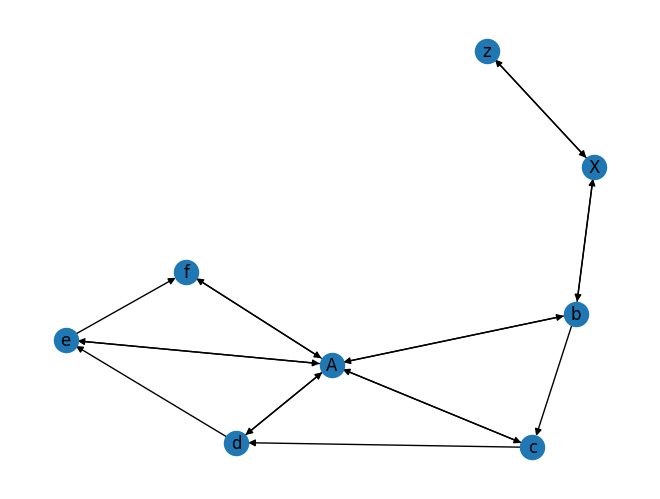

In [145]:
nx.draw(G, with_labels=True)

In [146]:
A = nx.adjacency_matrix(G)  
A_squared = A.dot(A)
A_cube = A_squared.dot(A)
print(A_cube.toarray())

[[4 6 5 6 6 6 0 1]
 [7 1 3 2 3 2 3 0]
 [6 1 2 2 2 3 1 0]
 [6 1 2 2 2 2 1 0]
 [5 1 2 2 2 2 1 0]
 [5 0 1 1 1 1 1 0]
 [1 3 1 2 1 1 0 2]
 [1 0 1 0 0 0 2 0]]


In [147]:
import pandas as pd

In [154]:
papers=['b','c','d','e','f','z']
author=["A","X"]
df=pd.DataFrame(papers,columns=["id"])

In [155]:
df

,id
0,b
1,c
2,d
3,e
4,f
5,z


In [156]:
self_citing_datas=[]
for i in author:
    cycles = find_cycles_for_node(G, i)
    flag=[]
    for j in cycles:
        j.index(i)
        rr=rotate_list(j,j.index(i))
        flag.append(rr)
    print(flag)
    df1=pd.DataFrame(flag,columns=['author','source','destination'])
    self_citing_datas.append(df1)
self_citing_datas=pd.concat(self_citing_datas).reset_index(drop=True)


[['A', 'b', 'c'], ['A', 'c', 'd'], ['A', 'e', 'f'], ['A', 'd', 'e']]
[]


In [157]:
self_citing_datas

,author,source,destination
0,A,b,c
1,A,c,d
2,A,e,f
3,A,d,e


In [158]:
tsr=[]
for i in df['id']:
    if i in list(self_citing_datas['source']):
        condition1=self_citing_datas['source'].isin([i])
        a=self_citing_datas[condition1].shape[0]/(G.degree(i)-2)
        a = "{:.2f}".format(a)
        tsr.append(a)
    else:
        tsr.append(0);    
df['TSR']=tsr

In [159]:
df

,id,TSR
0,b,0.33
1,c,0.50
2,d,0.50
3,e,0.50
4,f,0
5,z,0


In [160]:
df.set_index('id', inplace=True)
df

,TSR
id,
b,0.33
c,0.50
d,0.50
e,0.50
f,0
z,0


In [161]:
for node, data in G.nodes(data=True):
    print(node)
    print(data)
node_attributes

A
{}
b
{}
c
{}
d
{}
e
{}
f
{}
X
{}
z
{}


{'b': 0.2, 'c': 0.25, 'd': 0.25, 'e': 0.25, 'f': 0.0}

In [162]:
labels

{'A': 'A',
 'b': 'b: TSR=0.3333333333333333',
 'c': 'c: TSR=0.5',
 'd': 'd: TSR=0.5',
 'e': 'e: TSR=0.5',
 'f': 'f: TSR=0.0',
 'X': 'X'}

In [163]:
for node, data in G.nodes(data=True):
    print(node)
    print(data)
node_attributes

A
{}
b
{}
c
{}
d
{}
e
{}
f
{}
X
{}
z
{}


{'b': 0.2, 'c': 0.25, 'd': 0.25, 'e': 0.25, 'f': 0.0}

In [164]:
a=df.to_dict()["TSR"]
a

{'b': '0.33', 'c': '0.50', 'd': '0.50', 'e': '0.50', 'f': 0, 'z': 0}

In [165]:
labels=dict()
for i in G.nodes():
    print(i)
    print(a.get(i,0))
    if a.get(i)== None:
        labels[i]=i
    else:
        labels[i]=i+": TSR="+str(a.get(i,0))

A
0
b
0.33
c
0.50
d
0.50
e
0.50
f
0
X
0
z
0


In [166]:
labels

{'A': 'A',
 'b': 'b: TSR=0.33',
 'c': 'c: TSR=0.50',
 'd': 'd: TSR=0.50',
 'e': 'e: TSR=0.50',
 'f': 'f: TSR=0',
 'X': 'X',
 'z': 'z: TSR=0'}

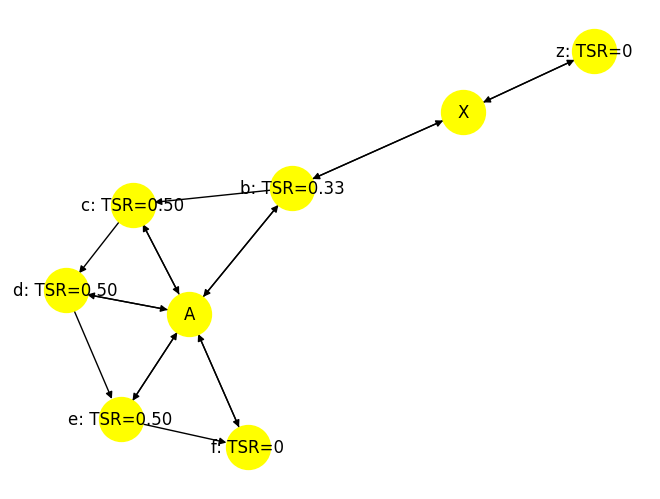

In [167]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


nx.draw(G, labels=labels, with_labels=True,node_size=1000,  node_color="yellow")

plt.show()